In [1]:
using IJulia 
IJulia.installkernel("Julia nodeps")
IJulia.clear_output();

In [2]:
using Pkg
using DataFrames
using Plots
using Clustering
using CSV
IJulia.clear_output();

# Wczytanie danych

In [3]:
data = CSV.read("C:\\Users\\lukas\\Desktop\\clustering.txt",header = ["x","y"])
first(data,5)

5√ó2 DataFrame
‚îÇ Row ‚îÇ x        ‚îÇ y        ‚îÇ
‚îÇ     ‚îÇ Float64  ‚îÇ Float64  ‚îÇ
‚îú‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îº‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚îÄ‚î§
‚îÇ 1   ‚îÇ 41.7889  ‚îÇ 52.2202  ‚îÇ
‚îÇ 2   ‚îÇ -96.5865 ‚îÇ 90.957   ‚îÇ
‚îÇ 3   ‚îÇ -54.1436 ‚îÇ -99.1534 ‚îÇ
‚îÇ 4   ‚îÇ 19.9292  ‚îÇ -45.8598 ‚îÇ
‚îÇ 5   ‚îÇ -82.9411 ‚îÇ 84.0992  ‚îÇ

Te dane reprezentujƒÖ punkty w przestrzeni \\( \mathbb{R}^2 \\).
Policzmy podstawowe statystyki dla tego zbioru punkt√≥w.

≈örednie:  \\( \bar{x} = -0.581 , \bar{y} = -8.010\\)

Minimia i Maksima:\\( x_{min} = -107.434 , y_{min} = -128.984 , x_{max} = 109.733 , y_{max} = 99.936\\)

Wiemy ju≈º gdzie znajdujƒÖ siƒô nasze punkty.

# Wizualizacja 

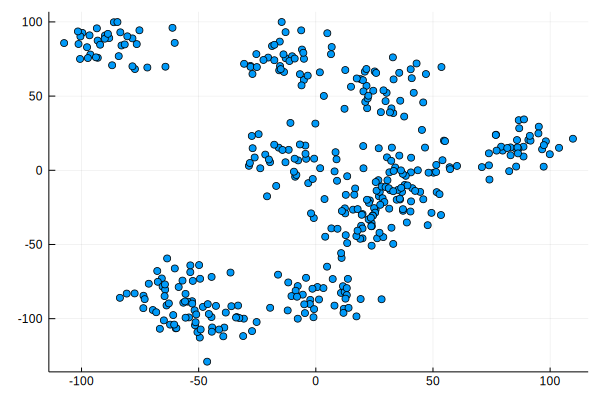

In [4]:
p = plot(data[1],data[2],seriestype = :scatter,legend = false)
IJulia.clear_output();p

Widaƒá ≈ºe nasze punkty nie sƒÖ trudne do rozdzielenia i czƒô≈õƒá z nich da siƒô ≈Çatwo podzieliƒá i przyporzƒÖdkowaƒá do grup.
Czƒô≈õƒá z grup lekko siƒô ze sobƒÖ pokrywa oraz kilka punkt√≥w le≈ºy pomiƒôdzy grupami.

# Klasteryzacja

Do tego procesu u≈ºyje pakietu [Clustering.jl](https://github.com/JuliaStats/Clustering.jl) .
Pierwszym algorytmem bƒôdziƒô K-means.
Zasada algorytmu polega na wylosowaniu n par wsp√≥≈Çrzƒôdnych i przyporzƒÖdkowaniu ka≈ºdego punktu z danych do najbli≈ºszej pary wsp√≥≈Çrzƒôdnych.
Nastƒôpnie dla ka≈ºdej grupy punkt√≥w przyporzƒÖdkowanej do konkretnej wsp√≥≈Çrzƒôdnej wyliczana jest nowa para wsp√≥≈Çrzƒôdnych na podstawie ≈õredniej z punkt√≥w nale≈ºƒÖcych do konkretnej grupy punkt√≥w. Proces ten powtarzamy dop√≥ki zachodzi zmiana przyporzƒÖdkowania punkt√≥w do grup lub przkroczymy wyznaczonƒÖ ilo≈õƒá iteracji algorytmu.

Sprawdzimy jak dobrze dzia≈Ça algorytm przyporzƒÖdkowujƒÖc go kolejno do k =  1,2,3...\\(\left \lfloor{\sqrt{n}}\right \rfloor\\) grup. 
Do zmierzenia jak dobrze klasteryzyje ten algorytm u≈ºyjemy metryki sumy odleg≈Ço≈õci punkt√≥w z ka≈ºdej ka≈ºdej grupy do ich punktu ≈õrodkowego.
Algorytm ten inicjuje wsp√≥≈Çrzƒôdne startowe ≈õrodk√≥w ka≈ºdej grupy losowo.
Aby zmaniejszyƒá wp≈Çyw losowo≈õci ka≈ºde grupowanie wyznaczymy 100 razy.

In [5]:
data_mat_T = transpose(convert(Matrix,data));
n = convert(Int16,floor(‚àösize(data)[1]))
Costs = zeros(n)
for i=1:100
    for j=1:n
        R = kmeans(data_mat_T, j; maxiter=200)
        Costs[j] += R.totalcost
    end
end
Costs = Costs/100;

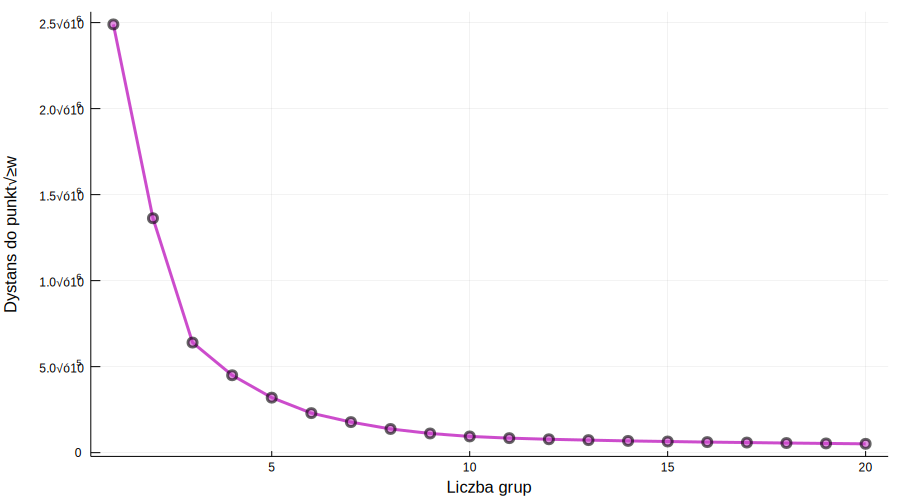

In [6]:
p1 = plot(Costs, legend= false , lw = 3, xlabel = "Liczba grup", ylabel = "Dystans do punkt√≥w",
    color=:lightrainbow, marker = (:circle, 5, 0.6, :match, stroke(3, 0.2, :black, :dot)),size = (900, 500))
IJulia.clear_output();p1

Dla warto≈õci parametru K = 1,2,3 nasz algorytm ma bardzo z≈Çe wyniki. Dlatego skupimy siƒô na wykresie dla k > 3.

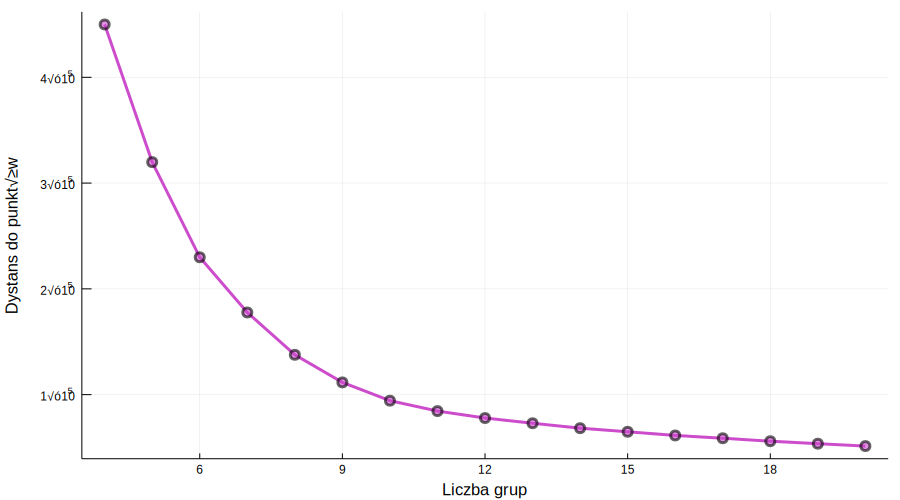

In [7]:
p2 = plot(4:n,Costs[4:n], legend= false , lw = 3, xlabel = "Liczba grup", ylabel = "Dystans do punkt√≥w",
    color=:lightrainbow, marker = (:circle, 5, 0.6, :match, stroke(3, 0.2, :black, :dot)),size = (900, 500))
IJulia.clear_output();p2  

Na powy≈ºszym wykresie widaƒá wyp≈Çaszczenie w okolicach parametru k = 9.
Dlatego sprawdzmy teraz jak wyglƒÖdajƒÖ te klasteryzacje dla parametr√≥w 7,8,9,10.

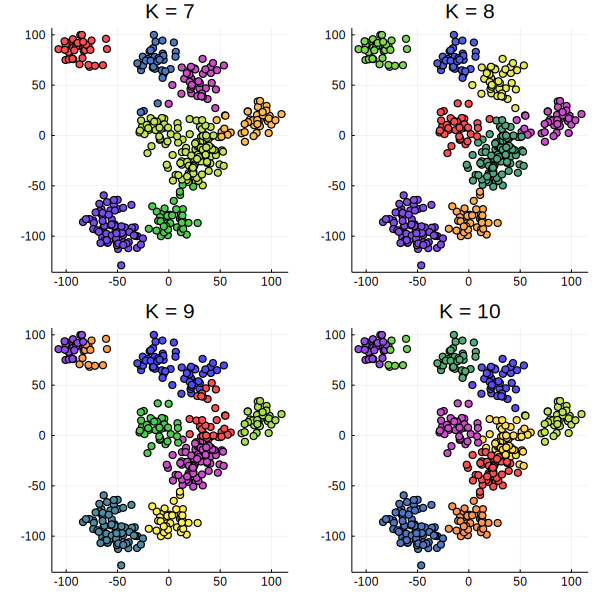

In [8]:
R7 = kmeans(data_mat_T, 7; maxiter=200);
sc7 = scatter(data[1], data[2], marker_z=R7.assignments,color=:lightrainbow, legend=false,title = "K = 7")
R8 = kmeans(data_mat_T, 8; maxiter=200);
sc8 = scatter(data[1], data[2], marker_z=R8.assignments,color=:lightrainbow, legend=false,title = "K = 8")
R9 = kmeans(data_mat_T, 9; maxiter=200);
sc9 = scatter(data[1], data[2], marker_z=R9.assignments,color=:lightrainbow, legend=false,title = "K = 9")
R10 = kmeans(data_mat_T, 10; maxiter=200);
sc10 = scatter(data[1], data[2], marker_z=R10.assignments,color=:lightrainbow, legend=false,title = "K = 10")
IJulia.clear_output();
plot(sc7, sc8, sc9, sc10, layout = (2, 2), legend = false,size = (600,600))

Trudno wykazaƒá wy≈ºszo≈õƒá kt√≥rejkolwiek warto≈õci parametru k nad innymi.

# Hierarchical Clustering

U≈ºyjemy teraz algorytmu kt√≥ry na poczƒÖtku tworzy tyle klasatr√≥w ile mamy punkt√≥w a potem ≈ÇƒÖczy ze sobƒÖ te kt√≥rƒô sƒÖ odpowiednio blisko.
Dziƒôki temu tworzy siƒô drzewo kt√≥re ma 400 li≈õci po kolei ≈ÇƒÖczy podobne do siebie klastry. 
Mo≈ºemy wiƒôc wybieraƒá ile klastr√≥w chcemy oraz do jakiego stopnia podobie≈Ñstwa klastry powinny byƒá z≈ÇƒÖczone.

Stowrzymy teraz macierz odleg≈Ço≈õci wed≈Çug kt√≥rej bƒôdzie obliczany stopie≈Ñ podobie≈Ñstwa.

In [22]:
Data = zeros(400,400);
for i=1:400
    for j=1:400
        Data[i,j] = ‚àö((data[i,1] - data[j,1])^2 + (data[i,2] - data[j,2])^2)
    end
end

In [36]:
result = hclust(Data, linkage=:single);

Do znajdywania klastr√≥w przydatna jest funkcja cutree w kt√≥rej dziƒôki parametrƒÖ k,h jeste≈õmy w stanie wybraƒá kolejno:

Ilo≈õƒá klastr√≥w

Stopie≈Ñ podobie≈Ñstwa

In [40]:
cutree(result, k = 8, h = 4);

‚îå Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
‚îÇ   caller = top-level scope at In[45]:1
‚îî @ Core In[45]:1
‚îå Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
‚îÇ   caller = top-level scope at In[45]:1
‚îî @ Core In[45]:1


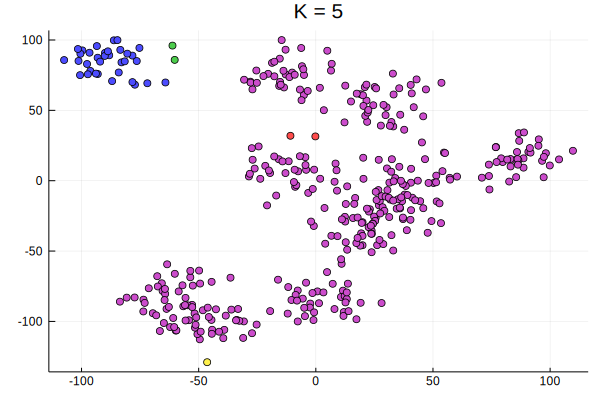

In [45]:
hiech = scatter(data[1], data[2], marker_z=cutree(result, k = 5),color=:lightrainbow, legend=false,title = "K = 5")

Jak widaƒá otrzymujemy inny spos√≥b klasteryzacji.
Zamiast otrzymywaƒá klastery bisko du≈ºych skupisk punkt√≥w dostajemy ogormne klastery jak i bardzo ma≈Çe.

Z powodu ma≈Çych zasob√≥w czasowych do okre≈õlenia odpowiedniej liczby klaster√≥w u≈ºyje wieloletniego do≈õwiadczenia i u≈ºyje metody ùúã razy oko.

‚îå Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
‚îÇ   caller = top-level scope at In[48]:1
‚îî @ Core In[48]:1
‚îå Warning: `getindex(df::DataFrame, col_ind::ColumnIndex)` is deprecated, use `df[!, col_ind]` instead.
‚îÇ   caller = top-level scope at In[48]:1
‚îî @ Core In[48]:1


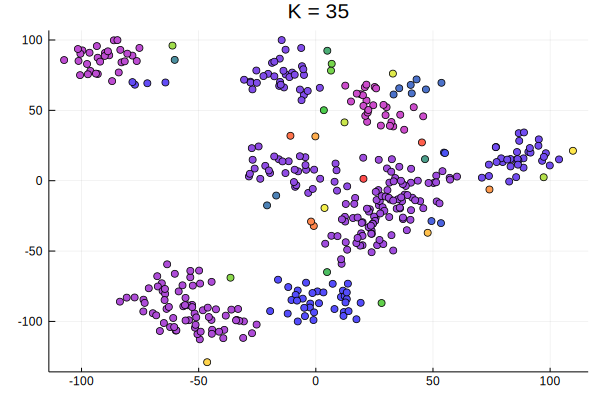

In [48]:
hiech = scatter(data[1], data[2], marker_z=cutree(result, k = 35),color=:lightrainbow, legend=false,title = "K = 35")

Dla k = 35 otrzymujemy dobre wyniki.